In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [6]:
dataparse= lambda x: pd.datetime.strptime(x, '%d-%m-%Y')
tata=pd.read_csv('tata.csv', parse_dates=['Date'],date_parser=dataparse)
tata

C:\Users\Nachiketh\AppData\Local\Temp\ipykernel_24028\300716134.py:1: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,TATAMOTORS,472.00,488.70,469.05,487.05,479.72,4024156
1,2017-01-03,TATAMOTORS,491.00,492.70,479.90,481.10,486.65,5814518
2,2017-01-04,TATAMOTORS,484.65,493.70,484.10,486.65,489.31,4769872
3,2017-01-05,TATAMOTORS,496.00,503.40,495.55,502.15,500.55,7961242
4,2017-01-06,TATAMOTORS,502.95,507.95,496.25,497.75,501.97,4907475
...,...,...,...,...,...,...,...,...
1482,2022-12-26,TATAMOTORS,380.25,390.70,375.20,384.80,385.10,16979026
1483,2022-12-27,TATAMOTORS,390.00,397.45,388.50,394.15,393.86,14372461
1484,2022-12-28,TATAMOTORS,394.00,395.90,390.40,391.30,392.83,8443917
1485,2022-12-29,TATAMOTORS,389.00,390.00,383.05,385.90,385.43,15627403


In [7]:
tata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1487 non-null   datetime64[ns]
 1   Symbol     1487 non-null   object        
 2   Open       1487 non-null   float64       
 3   High       1487 non-null   float64       
 4   Low        1487 non-null   float64       
 5   Close      1487 non-null   float64       
 6   Adj Close  1487 non-null   float64       
 7   Volume     1487 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 93.1+ KB


In [4]:
#tata1['Date']=pd.to_datetime(tata['Date'])

In [8]:
print(f'Dataframe contains stock price between {tata.Date.min()} {tata.Date.max()}')
print(f'Total days={(tata.Date.max()  - tata.Date.min()).days}days')

Dataframe contains stock price between 2017-01-02 00:00:00 2022-12-30 00:00:00
Total days=2188days


In [6]:
tata.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1.487000e+03
mean,302.195662,306.484364,297.113820,301.407734,301.853282,3.203637e+07
std,134.430701,135.445400,132.928424,134.052959,134.190024,3.556873e+07
min,66.500000,66.900000,63.500000,65.300000,65.500000,1.189742e+06
25%,173.600000,176.825000,170.400000,173.550000,173.705000,1.002444e+07
50%,309.200000,313.800000,305.000000,308.800000,309.640000,1.924017e+07
75%,428.525000,433.875000,422.775000,427.025000,428.805000,4.162249e+07
max,549.000000,552.000000,541.550000,548.900000,545.770000,3.905778e+08


<AxesSubplot:>

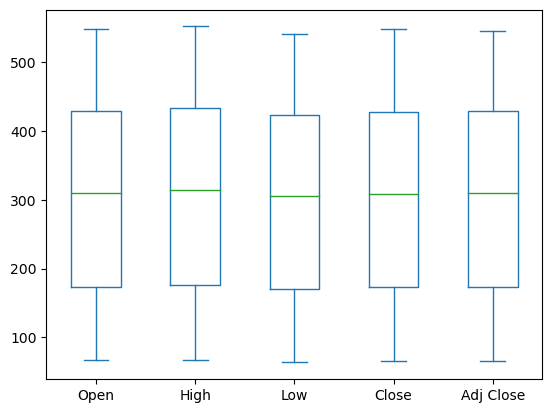

In [7]:
tata[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [4]:
layout=go.Layout(
    title='Stock Price Of Tata',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family="Courier New, monospace",
            size=12,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family="Courier New, monospace",
            size=12,
            color='#7f7f7f'
        )
    )
)

tata_data=[{'x':tata['Date'],'y':tata['Close']}]
plot=go.Figure(data=tata_data, layout=layout)

In [9]:
tata.head()

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,TATAMOTORS,472.00,488.70,469.05,487.05,479.72,4024156
1,2017-01-03,TATAMOTORS,491.00,492.70,479.90,481.10,486.65,5814518
2,2017-01-04,TATAMOTORS,484.65,493.70,484.10,486.65,489.31,4769872
3,2017-01-05,TATAMOTORS,496.00,503.40,495.55,502.15,500.55,7961242
4,2017-01-06,TATAMOTORS,502.95,507.95,496.25,497.75,501.97,4907475


In [10]:
iplot(plot)

In [11]:
#Building the regression model
from sklearn.model_selection import train_test_split
#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#for model evolution
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [12]:
#split the data into train and test sets
X=np.array(tata.index).reshape(-1,1)
Y=tata['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [13]:
#feature scaling
scaler=StandardScaler().fit(X_train)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
#Creating a linear model
lm=LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [16]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = "markers",
    name = "Actual"
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tata_data = [trace0,trace1]
layout.xaxis.title.text = "Day"
plot2 = go.Figure(data=tata_data, layout=layout)
iplot(plot2)

In [17]:
iplot(plot2)

In [18]:
#calculate scores for model evaluation
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}

'''
print(scores)


Metric           Train                Test        
r2_score  0.005693529885313908	-0.016041232946939044
MSE       17536.86995491579	18998.767905223875


